In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import wilcoxon as wilcoxon


# meta analysis functions
import sys
sys.path.append('/code/')
from util import analysis
from util import plotting
from util import util_continuous as utils


In [2]:
# Import seaborn
import seaborn as sns

sns.set_theme(style="ticks", rc=utils.sns_custom_params, font_scale=0.6)


In [3]:
def plot_agent_nullclines(fig, ax, dpdx, dpdy, meshX, meshY, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y,
                          color_x = 'blue', color_y = 'black'):
    
    # Create a stream plot
    if fig == None:
        fig, ax = plt.subplots(figsize=(1.3, 1.3))

    # add nullclines
    nullclines_x = alpha_x*-dpdx(meshX, meshY, penalty_x, penalty_y)
    nullclines_y = alpha_y*-dpdy(meshX, meshY, penalty_x, penalty_y)

    # Plot nullclines
    ax.contour(meshX, meshY, nullclines_x, levels=[level_x], colors=color_x)
    ax.contour(meshX, meshY, nullclines_y, levels=[level_y], colors=color_y)
        

In [4]:
def plot_agent_labels(fig, ax, agent_x = 'User', agent_y = 'Machine', color_x = 'blue', color_y = 'black'):
    
    # Create a stream plot
    if fig == None:
        fig, ax = plt.subplots(figsize=(1.3, 1.3))
        
    # Set labels and title
    ax.set_xlabel(agent_x)
    ax.xaxis.label.set_color(color_x)
    ax.set_ylabel(agent_y)
    ax.yaxis.label.set_color(color_y)

In [5]:
def plot_agent_streamplots(fig, ax, dpdx, dpdy, meshX, meshY, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y, 
                         agent_x = 'User', agent_y = 'Machine', color_x = 'blue', color_y = 'black',
                         stream_color = 'lightgray', stream_lw = 0.5, stream_density = 0.5, stream_arrowsize = 0.4):


    # Create a stream plot
    if fig == None:
        fig, ax = plt.subplots(figsize=(1.3, 1.3))

    ax.streamplot(meshX, meshY, 
              -alpha_x*dpdx(meshX, meshY, penalty_x, penalty_y), 
              -alpha_y*dpdy(meshX, meshY, penalty_x, penalty_y), 
              color=stream_color, linewidth=stream_lw,  density=stream_density, arrowsize=stream_arrowsize)
    
    plot_agent_nullclines(fig, ax, dpdx, dpdy, meshX, meshY, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y,
                          color_x, color_y)


    plot_agent_labels(fig, ax, agent_x, agent_y, color_x, color_y)

In [6]:
def plot_agent_quiver(fig, ax, dpdx, dpdy, meshX, meshY, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y, 
                         agent_x = 'User', agent_y = 'Machine', color_x = 'blue', color_y = 'black',
                         stream_color = 'lightgray', quiver_lw = 10, quiver_width = 0.01):

    # Create a  plot
    if fig == None:
        fig, ax = plt.subplots(figsize=(1.3, 1.3))

    ax.quiver(meshX, meshY, 
              -alpha_x*dpdx(meshX, meshY, penalty_x, penalty_y), 
              -alpha_y*dpdy(meshX, meshY, penalty_x, penalty_y), 
              color=stream_color, scale=1)
              #linewidth=quiver_lw, width=quiver_width)

    plot_agent_nullclines(fig, ax, dpdx, dpdy, meshX, meshY, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y,
                          color_x, color_y)


    plot_agent_labels(fig, ax, agent_x, agent_y, color_x, color_y)

In [7]:
label_size = 6

# # Define the functions
# def p(x, y, l_x, l_y):
#     return (1 - x*y)**2 + l_x*x**2 + l_y*y**2

# # Define partial derivatives
# def dpdx(x, y, l_x, l_y):
#     return 2*l_x*x - 2*y*(1-x*y)

# def dpdy(x, y, l_x, l_y):
#     return 2*l_y*y - 2*x*(1-x*y)


t = 1

# Define the functions
def p(x, y, l_x, l_y):
    return (x*y - t)**2 + l_x*x**2 + l_y*y**2

# Define partial derivatives
def dpdx(x, y, l_x, l_y):
    return 2*l_x*x + 2*y*(x*y - t)

def dpdy(x, y, l_x, l_y):
    return 2*l_y*y + 2*x*(x*y - t)

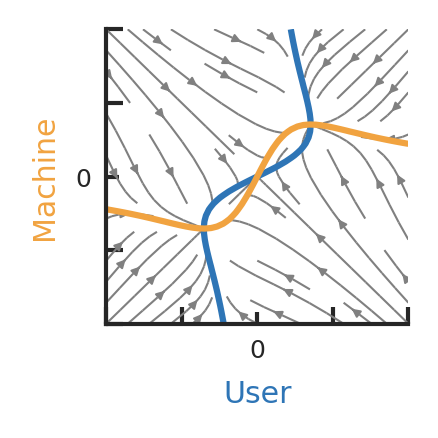

In [10]:
## Matched Case: Learning Rates are Equal, Penaly Params are Equal

# Create a grid of x and y values
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# set penalty params
penalty_x = 0.5
penalty_y = 0.5

# set the learning rates
alpha_x = 1
alpha_y = 1

# set the level sets
level_x = 0
level_y = 0

fig, ax = plt.subplots(figsize=(1.3, 1.3))
plotting.figure_set_up(ax, tick_size=label_size, 
                        bottom=True, left=True,
                        x_major = 5, x_minor = 1, 
                        y_major=5, y_minor=1)
        
# plot_agent_streamplots(fig, ax, dpdx, dpdy, X, Y, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y, 
#                          agent_x = 'User', agent_y = 'Machine', 
#                          color_x = utils.colors['E'], color_y = utils.colors['D'])

plot_agent_streamplots(fig, ax, dpdx, dpdy, X, Y, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y, 
                         agent_x = 'User', agent_y = 'Machine', stream_color = 'gray',
                         color_x = '#2E75B6', color_y = utils.colors['D'])


In [21]:
image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'fig3-nullclines-zoomedin.pdf'
PATH = '/results/'
fig.savefig(PATH + image_name, format=image_format, dpi=300)


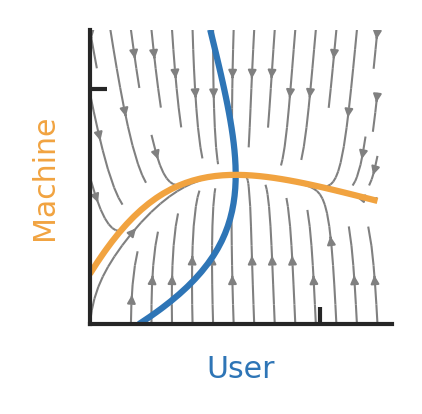

In [22]:
## Learning Rates are Unequal

# Create a grid of x and y values
x = np.linspace(0.2, 1.2, 40)
y = np.linspace(0.2, 1.2, 40)
X, Y = np.meshgrid(x, y)

# set penalty params
penalty_x = 0.5
penalty_y = 0.5

# set the learning rates
alpha_x = 1
alpha_y = 10

# set the level sets
level_x = 0
level_y = 0

fig, ax = plt.subplots(figsize=(1.3, 1.3))
plotting.figure_set_up(ax, tick_size=label_size, 
                        bottom=True, left=True,
                        x_major = 2, x_minor = 1, 
                        y_major=2, y_minor=1)
        
plot_agent_streamplots(fig, ax, dpdx, dpdy, X, Y, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y, 
                         agent_x = 'User', agent_y = 'Machine', stream_color='gray',
                         color_x = '#2E75B6', color_y = utils.colors['D'], )

# plot time data for discrete-time case
t_len = 4
x = np.zeros(t_len)




to discretize this: 

x[0] = ...
for t in T:
x[t] = x[t-1] - alpha*gradient

In [14]:
image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'fig3-nullclines-learning-rate.pdf'
PATH = '/results/'
fig.savefig(PATH + image_name, format=image_format, dpi=300)


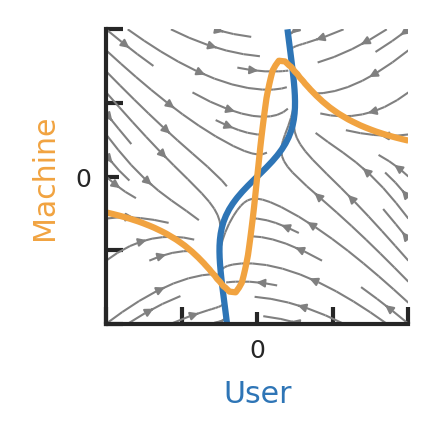

In [15]:
## Learning Rates are Unequal, Level Sets are different

# Create a grid of x and y values
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

# set penalty params
penalty_x = 1
penalty_y = 0.1

# set the learning rates
alpha_x = 1
alpha_y = 1

# set the level sets
level_x = 0
level_y = 0

fig, ax = plt.subplots(figsize=(1.3, 1.3))
plotting.figure_set_up(ax, tick_size=label_size, 
                        bottom=True, left=True,
                        x_major = 5, x_minor = 1, 
                        y_major=5, y_minor=1)
        
plotting.plot_agent_nullcline(fig, ax, dpdx, dpdy, X, Y, alpha_x, alpha_y, penalty_x, penalty_y, level_x, level_y, 
                         agent_x = 'User', agent_y = 'Machine', stream_color='gray',
                         color_x = '#2E75B6', color_y = utils.colors['D'])

In [13]:
image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'fig3-nullclines-penalty-params.pdf'
PATH = '/results/'
fig.savefig(PATH + image_name, format=image_format, dpi=300)